In [4]:
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/a/forecastdemand_vic.csv
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/b/forecastdemand_sa.csv
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/c/forecastdemand_qld.csv
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/d/temprature_qld.csv
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/d/temprature_sa.csv
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/d/temprature_vic.csv
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/d/totaldemand_qld.csv
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/d/totaldemand_sa.csv
#Documents/GitHub/UNSW-capstone-group-g/data/Australia/d/totaldemand_vic.csv


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [82]:
import os
print(os.getcwd())

/Users/joshuaevans/Documents/GitHub/UNSW-capstone-group-g/report


In [83]:
forecastdemand_vic = pd.read_csv("../data/Australia/a/forecastdemand_vic.csv")
forecastdemand_sa = pd.read_csv("../data/Australia/b/forecastdemand_sa.csv")
forecastdemand_qld = pd.read_csv("../data/Australia/c/forecastdemand_qld.csv")
temperature_qld = pd.read_csv("../data/Australia/d/temprature_qld.csv")  # There's a typo in 'temperature' in the file path
temperature_sa = pd.read_csv("../data/Australia/d/temprature_sa.csv")  # Same typo as above
temperature_vic = pd.read_csv("../data/Australia/d/temprature_vic.csv")  # Same typo as above
totaldemand_qld = pd.read_csv("../data/Australia/d/totaldemand_qld.csv")
totaldemand_sa = pd.read_csv("../data/Australia/d/totaldemand_sa.csv")
totaldemand_vic = pd.read_csv("../data/Australia/d/totaldemand_vic.csv")

In [84]:
def summary_statistics(df):
    print("First 5 rows:")
    print(df.head(15))
    print("\nInfo:")
    print(df.info())
    print("\nSummary statistics for numeric columns:")
    print(df.describe())
    print("\nMissing values count per column:")
    print(df.isnull().sum())
    print("-" * 50)  # Separator


In [85]:
def visualize_data(df):

    df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()
    
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        sns.boxplot(x=df[column])
        plt.show()
    
    if len(df.select_dtypes(include=['float64', 'int64']).columns) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
        plt.show()


EDA for forecastdemand_sa:
First 5 rows:
    PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0         2016123018      SA1        71         1394.41  2016-12-30 12:31:25   
1         2016123018      SA1        72         1285.07  2016-12-30 12:31:25   
2         2016123018      SA1        73         1221.70  2016-12-30 12:31:25   
3         2016123018      SA1        74         1141.86  2016-12-30 12:31:25   
4         2016123018      SA1        75         1087.78  2016-12-30 12:31:25   
5         2016123018      SA1        76         1053.72  2016-12-30 12:31:25   
6         2016123018      SA1        77         1038.70  2016-12-30 12:31:25   
7         2016123018      SA1        78         1013.66  2016-12-30 12:31:25   
8         2016123018      SA1        79          992.61  2016-12-30 12:31:25   
9         2016123019      SA1        70         1387.78  2016-12-30 13:01:33   
10        2016123019      SA1        71         1281.57  2016-12-30 13:01:33   

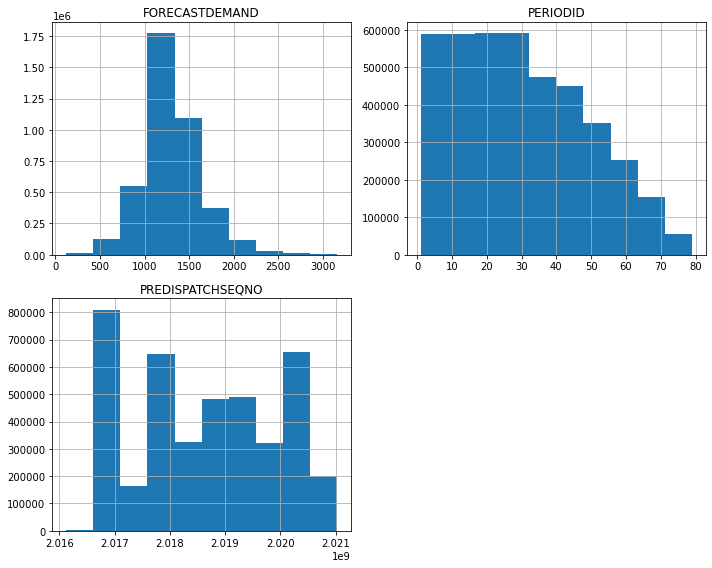

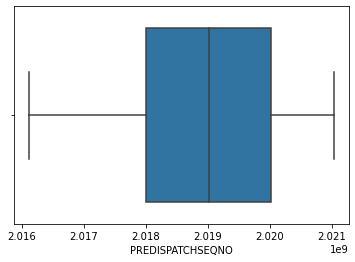

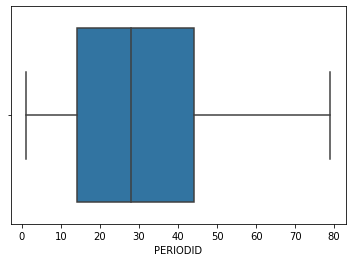

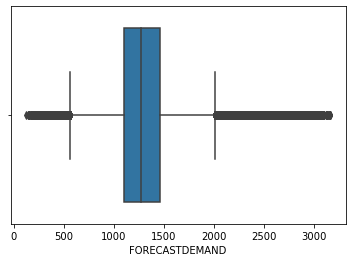

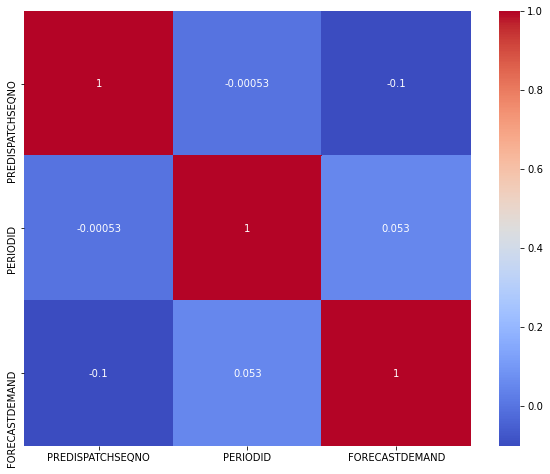

EDA for forecastdemand_qld:
First 5 rows:
    PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0         2016123018     QLD1        71         6425.36  2016-12-30 12:31:25   
1         2016123018     QLD1        72         6193.34  2016-12-30 12:31:25   
2         2016123018     QLD1        73         6016.45  2016-12-30 12:31:25   
3         2016123018     QLD1        74         5859.23  2016-12-30 12:31:25   
4         2016123018     QLD1        75         5767.15  2016-12-30 12:31:25   
5         2016123018     QLD1        76         5699.06  2016-12-30 12:31:25   
6         2016123018     QLD1        77         5640.71  2016-12-30 12:31:25   
7         2016123018     QLD1        78         5608.31  2016-12-30 12:31:25   
8         2016123018     QLD1        79         5566.57  2016-12-30 12:31:25   
9         2016123019     QLD1        70         6425.42  2016-12-30 13:01:33   
10        2016123019     QLD1        71         6192.33  2016-12-30 13:01:33  

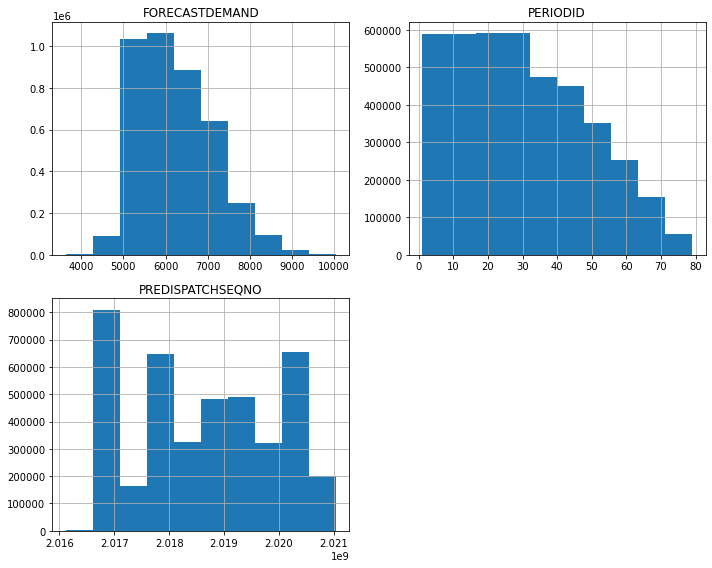

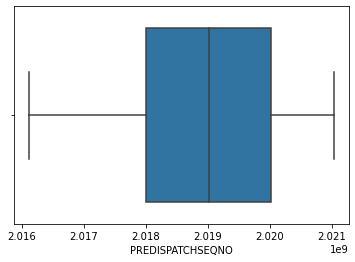

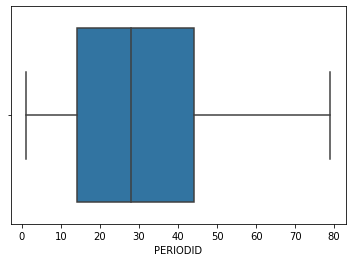

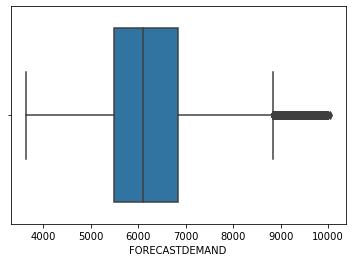

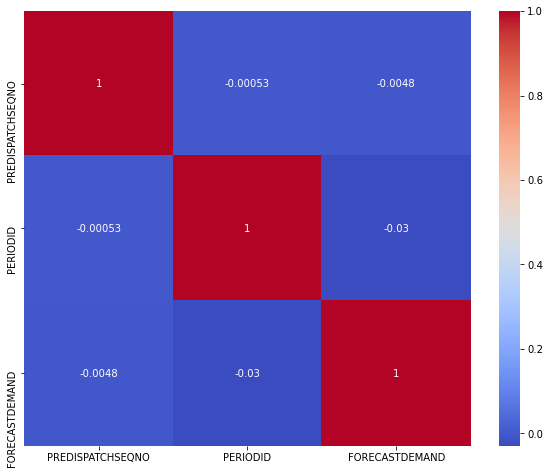

EDA for forecastdemand_vic.csv:
First 5 rows:
    PREDISPATCHSEQNO REGIONID  PERIODID  FORECASTDEMAND          LASTCHANGED  \
0         2016123018     VIC1        71         4160.74  2016-12-30 12:31:25   
1         2016123018     VIC1        72         3999.64  2016-12-30 12:31:25   
2         2016123018     VIC1        73         3836.30  2016-12-30 12:31:25   
3         2016123018     VIC1        74         3681.87  2016-12-30 12:31:25   
4         2016123018     VIC1        75         3457.38  2016-12-30 12:31:25   
5         2016123018     VIC1        76         3352.85  2016-12-30 12:31:25   
6         2016123018     VIC1        77         3275.50  2016-12-30 12:31:25   
7         2016123018     VIC1        78         3226.50  2016-12-30 12:31:25   
8         2016123018     VIC1        79         3200.55  2016-12-30 12:31:25   
9         2016123019     VIC1        70         4138.12  2016-12-30 13:01:33   
10        2016123019     VIC1        71         3985.27  2016-12-30 13:01:

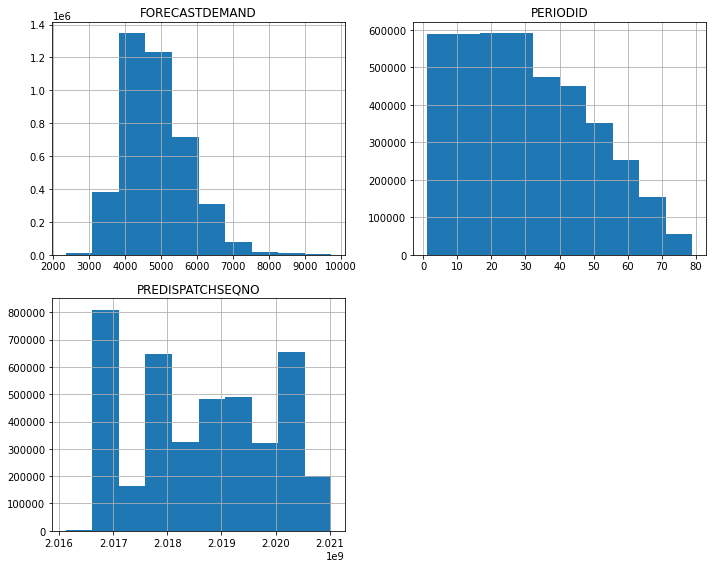

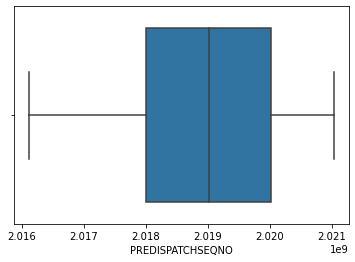

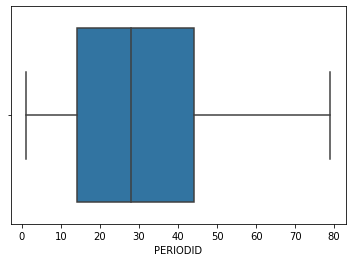

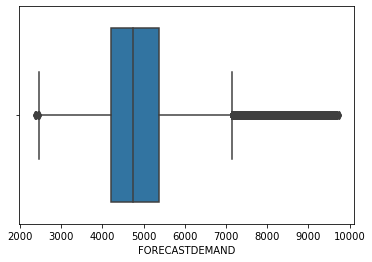

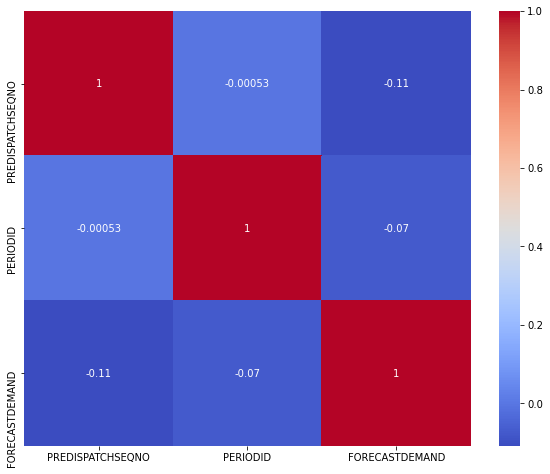

EDA for temperature_qld:
First 5 rows:
                        LOCATION        DATETIME  TEMPERATURE
0   Brisbane Archerfield Airport  1/01/2010 0:00         23.6
1   Brisbane Archerfield Airport  1/01/2010 0:30         23.7
2   Brisbane Archerfield Airport  1/01/2010 1:00         23.5
3   Brisbane Archerfield Airport  1/01/2010 1:30         22.6
4   Brisbane Archerfield Airport  1/01/2010 2:00         22.0
5   Brisbane Archerfield Airport  1/01/2010 2:30         21.9
6   Brisbane Archerfield Airport  1/01/2010 3:00         22.0
7   Brisbane Archerfield Airport  1/01/2010 3:30         21.4
8   Brisbane Archerfield Airport  1/01/2010 4:00         21.5
9   Brisbane Archerfield Airport  1/01/2010 4:30         21.5
10  Brisbane Archerfield Airport  1/01/2010 5:00         21.4
11  Brisbane Archerfield Airport  1/01/2010 5:30         21.5
12  Brisbane Archerfield Airport  1/01/2010 6:00         22.0
13  Brisbane Archerfield Airport  1/01/2010 6:30         22.7
14  Brisbane Archerfield Airpor

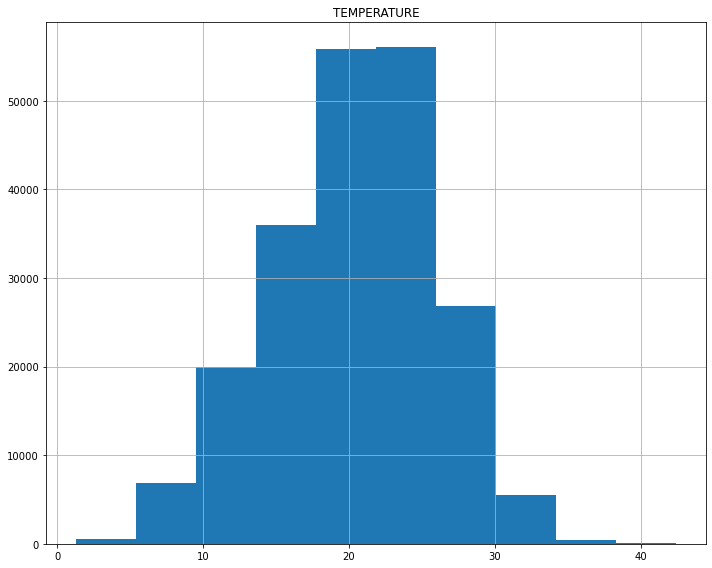

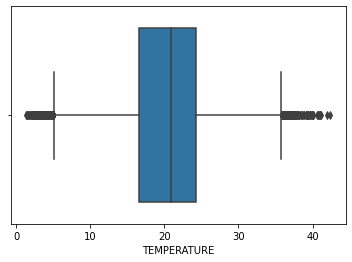

EDA for temperature_sa:
First 5 rows:
    Unnamed: 0              LOCATION             DATETIME  TEMPERATURE
0            0  Adelaide (Kent Town)  2010-01-01 00:00:00         23.6
1            1  Adelaide (Kent Town)  2010-01-01 00:30:00         23.7
2            2  Adelaide (Kent Town)  2010-01-01 01:00:00         23.5
3            3  Adelaide (Kent Town)  2010-01-01 01:30:00         22.6
4            4  Adelaide (Kent Town)  2010-01-01 02:00:00         22.0
5            5  Adelaide (Kent Town)  2010-01-01 02:30:00         21.9
6            6  Adelaide (Kent Town)  2010-01-01 03:00:00         22.0
7            7  Adelaide (Kent Town)  2010-01-01 03:30:00         21.4
8            8  Adelaide (Kent Town)  2010-01-01 04:00:00         21.5
9            9  Adelaide (Kent Town)  2010-01-01 04:30:00         21.5
10          10  Adelaide (Kent Town)  2010-01-01 05:00:00         21.4
11          11  Adelaide (Kent Town)  2010-01-01 05:30:00         21.5
12          12  Adelaide (Kent Town)  2

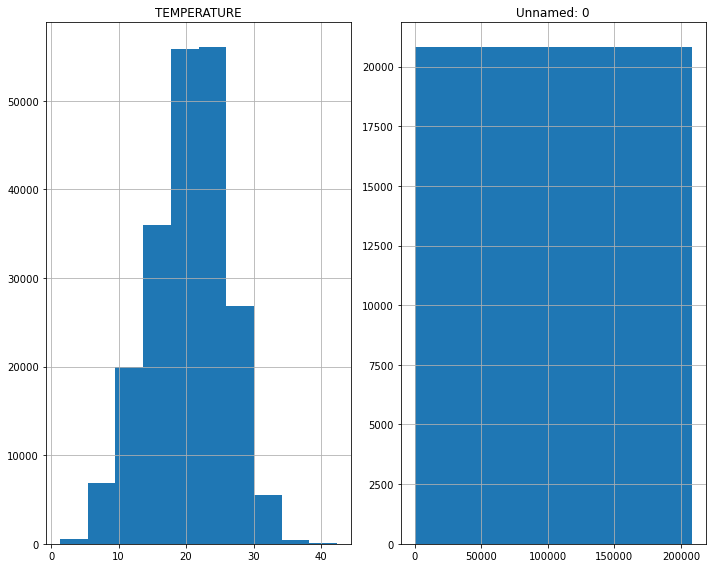

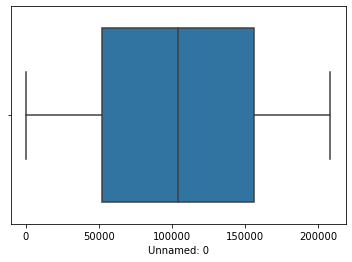

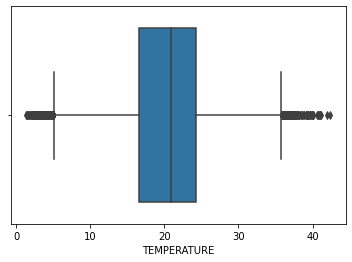

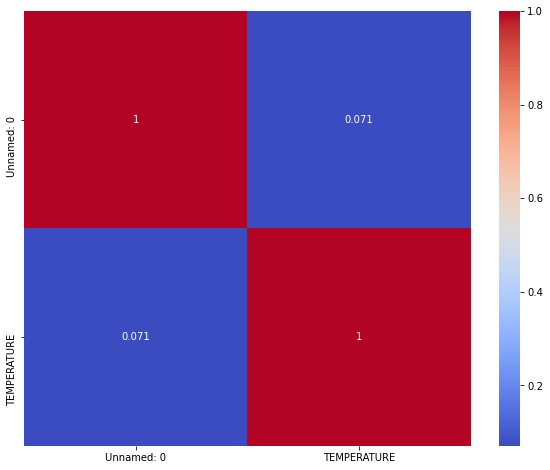

EDA for temperature_vic:
First 5 rows:
                    LOCATION          DATETIME  TEMPERATURE
0   Melbourne (Olympic Park)  31/05/2013 15:00         18.2
1   Melbourne (Olympic Park)  31/05/2013 15:30         18.3
2   Melbourne (Olympic Park)  31/05/2013 16:00         18.3
3   Melbourne (Olympic Park)  31/05/2013 16:30         18.3
4   Melbourne (Olympic Park)  31/05/2013 17:00         18.2
5   Melbourne (Olympic Park)  31/05/2013 17:30         18.1
6   Melbourne (Olympic Park)  31/05/2013 18:00         17.5
7   Melbourne (Olympic Park)  31/05/2013 18:30         17.2
8   Melbourne (Olympic Park)  31/05/2013 19:00         16.8
9   Melbourne (Olympic Park)  31/05/2013 19:30         16.4
10  Melbourne (Olympic Park)  31/05/2013 20:00         16.3
11  Melbourne (Olympic Park)  31/05/2013 20:30         16.0
12  Melbourne (Olympic Park)  31/05/2013 21:00         15.8
13  Melbourne (Olympic Park)  31/05/2013 21:30         15.9
14  Melbourne (Olympic Park)  31/05/2013 22:00         15.6



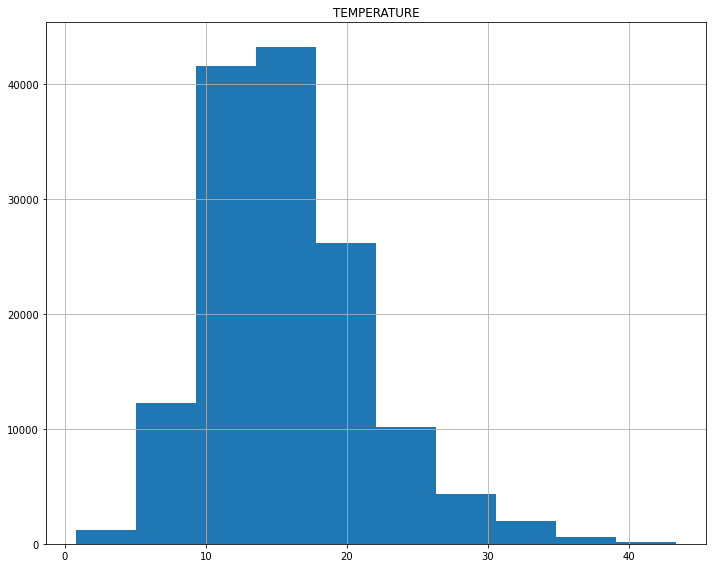

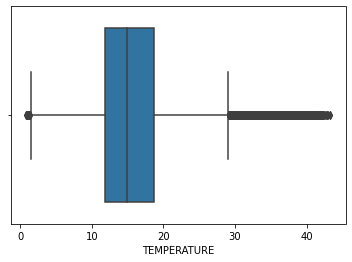

EDA for totaldemand_qld:
First 5 rows:
               DATETIME  TOTALDEMAND REGIONID
0   2010-01-01 00:00:00      5561.21     QLD1
1   2010-01-01 00:30:00      5422.25     QLD1
2   2010-01-01 01:00:00      5315.98     QLD1
3   2010-01-01 01:30:00      5186.70     QLD1
4   2010-01-01 02:00:00      5050.83     QLD1
5   2010-01-01 02:30:00      4924.74     QLD1
6   2010-01-01 03:00:00      4833.84     QLD1
7   2010-01-01 03:30:00      4815.04     QLD1
8   2010-01-01 04:00:00      4816.91     QLD1
9   2010-01-01 04:30:00      4791.08     QLD1
10  2010-01-01 05:00:00      4772.35     QLD1
11  2010-01-01 05:30:00      4754.22     QLD1
12  2010-01-01 06:00:00      4794.62     QLD1
13  2010-01-01 06:30:00      4914.95     QLD1
14  2010-01-01 07:00:00      5033.77     QLD1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATETIME     1965

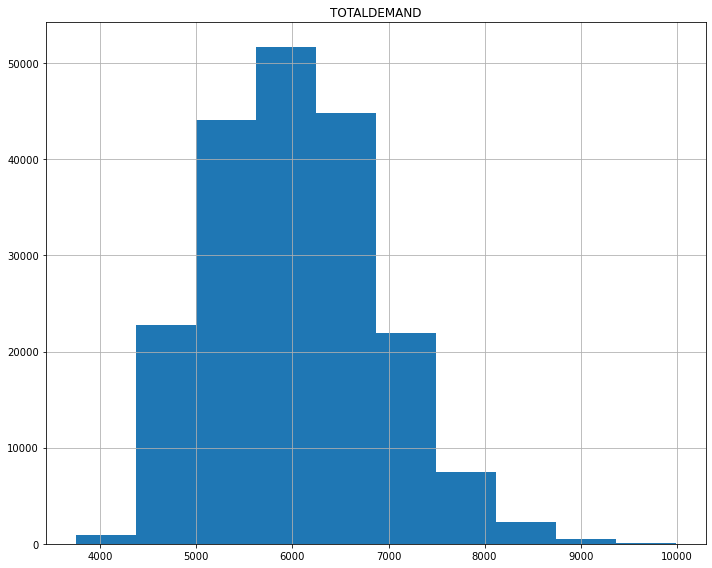

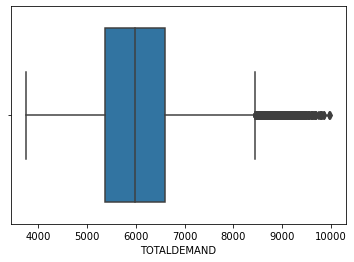

EDA for totaldemand_sa:
First 5 rows:
               DATETIME  TOTALDEMAND REGIONID
0   2010-01-01 00:30:00      1385.23      SA1
1   2010-01-01 01:00:00      1338.53      SA1
2   2010-01-01 01:30:00      1260.39      SA1
3   2010-01-01 02:00:00      1189.31      SA1
4   2010-01-01 02:30:00      1141.12      SA1
5   2010-01-01 03:00:00      1109.25      SA1
6   2010-01-01 03:30:00      1086.98      SA1
7   2010-01-01 04:00:00      1073.51      SA1
8   2010-01-01 04:30:00      1073.60      SA1
9   2010-01-01 05:00:00      1070.35      SA1
10  2010-01-01 05:30:00      1065.02      SA1
11  2010-01-01 06:00:00      1033.16      SA1
12  2010-01-01 06:30:00      1045.14      SA1
13  2010-01-01 07:00:00      1074.99      SA1
14  2010-01-01 07:30:00      1105.50      SA1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196512 entries, 0 to 196511
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATETIME     19651

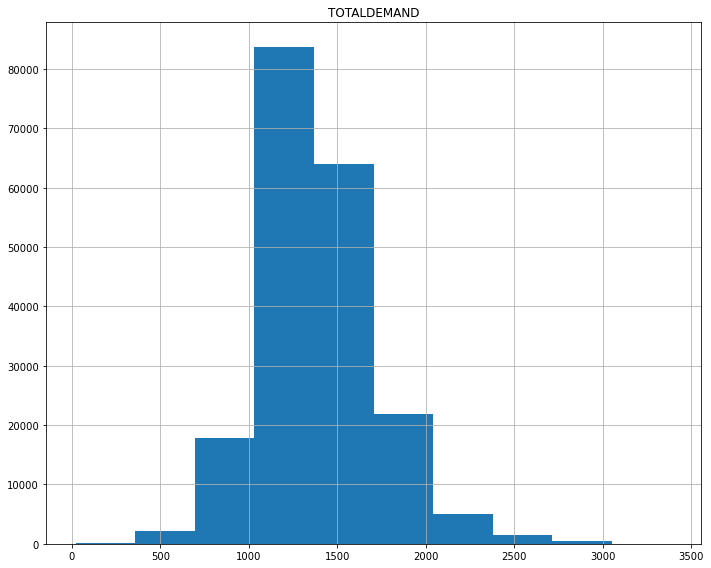

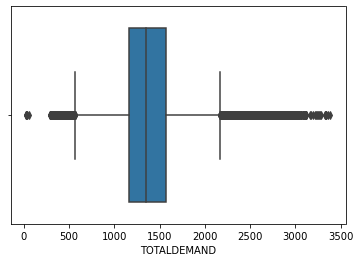

EDA for totaldemand_vic:
First 5 rows:
               DATETIME  TOTALDEMAND REGIONID
0   2010-01-01 00:00:00      5426.12     VIC1
1   2010-01-01 00:30:00      5111.02     VIC1
2   2010-01-01 01:00:00      4960.03     VIC1
3   2010-01-01 01:30:00      5283.40     VIC1
4   2010-01-01 02:00:00      5046.15     VIC1
5   2010-01-01 02:30:00      4796.18     VIC1
6   2010-01-01 03:00:00      4627.19     VIC1
7   2010-01-01 03:30:00      4511.14     VIC1
8   2010-01-01 04:00:00      4441.30     VIC1
9   2010-01-01 04:30:00      4432.51     VIC1
10  2010-01-01 05:00:00      4444.12     VIC1
11  2010-01-01 05:30:00      4433.94     VIC1
12  2010-01-01 06:00:00      4450.77     VIC1
13  2010-01-01 06:30:00      4545.16     VIC1
14  2010-01-01 07:00:00      4664.22     VIC1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   DATETIME     1965

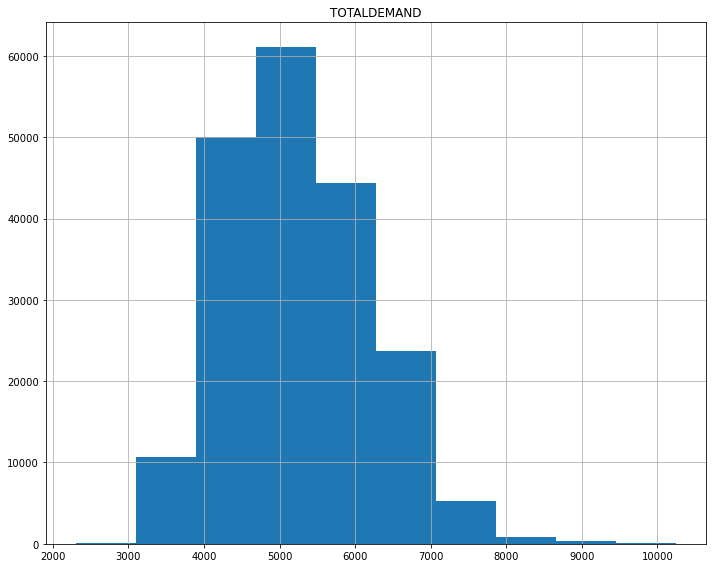

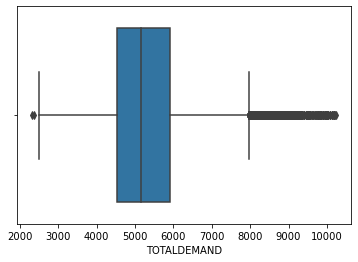

In [86]:
dataframes = {
    'forecastdemand_sa': forecastdemand_sa,
    'forecastdemand_qld': forecastdemand_qld,
    'forecastdemand_vic.csv':forecastdemand_vic,
    'temperature_qld': temperature_qld,
    'temperature_sa': temperature_sa,
    'temperature_vic': temperature_vic,
    'totaldemand_qld': totaldemand_qld,
    'totaldemand_sa': totaldemand_sa,
    'totaldemand_vic': totaldemand_vic
}

for name, dataframe in dataframes.items():
    print(f"EDA for {name}:")
    summary_statistics(dataframe)
    visualize_data(dataframe)
    


In [87]:
forecastdemand_sa['LASTCHANGED'] = pd.to_datetime(forecastdemand_sa['LASTCHANGED'])
forecastdemand_sa['DATETIME'] = pd.to_datetime(forecastdemand_sa['DATETIME'])
forecastdemand_qld['LASTCHANGED'] = pd.to_datetime(forecastdemand_qld['LASTCHANGED'])
forecastdemand_qld['DATETIME'] = pd.to_datetime(forecastdemand_qld['DATETIME'])
forecastdemand_vic['LASTCHANGED'] = pd.to_datetime(forecastdemand_vic['LASTCHANGED'])
forecastdemand_vic['DATETIME'] = pd.to_datetime(forecastdemand_vic['DATETIME'])


print(forecastdemand_sa.info())
print(forecastdemand_qld.info())
print(forecastdemand_vic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 187.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 187.5+ 

In [88]:
dataframes = [forecastdemand_qld, forecastdemand_vic, totaldemand_sa, totaldemand_qld, temperature_vic, temperature_sa, temperature_qld, totaldemand_vic]

for df in dataframes:
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])

for df in dataframes:
    print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 187.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095592 entries, 0 to 4095591
Data columns (total 6 columns):
 #   Column            Dtype         
---  ------            -----         
 0   PREDISPATCHSEQNO  int64         
 1   REGIONID          object        
 2   PERIODID          int64         
 3   FORECASTDEMAND    float64       
 4   LASTCHANGED       datetime64[ns]
 5   DATETIME          datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 187.5+ 

In [89]:

min_date = forecastdemand_sa['DATETIME'].min()
max_date = forecastdemand_sa['DATETIME'].max()

print(f"Date range: {min_date} to {max_date}")


Date range: 2017-01-01 00:00:00 to 2021-03-19 04:00:00


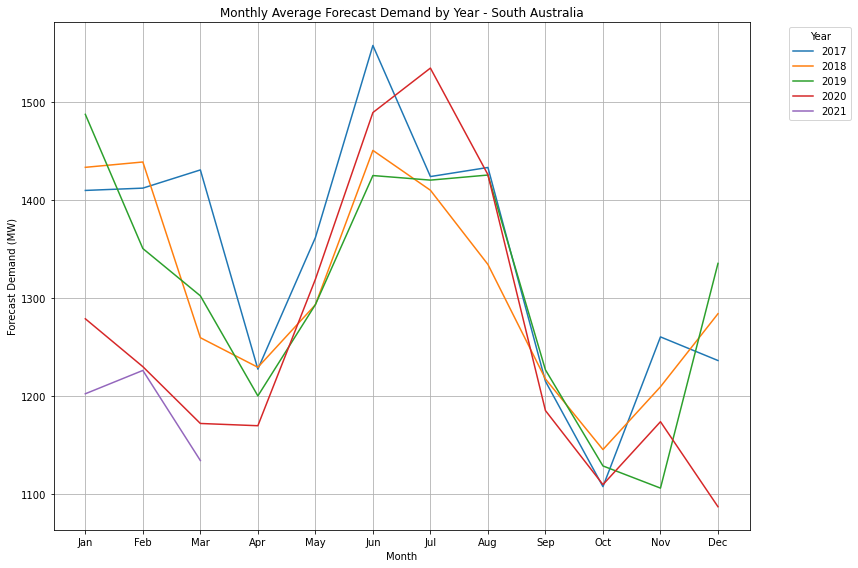

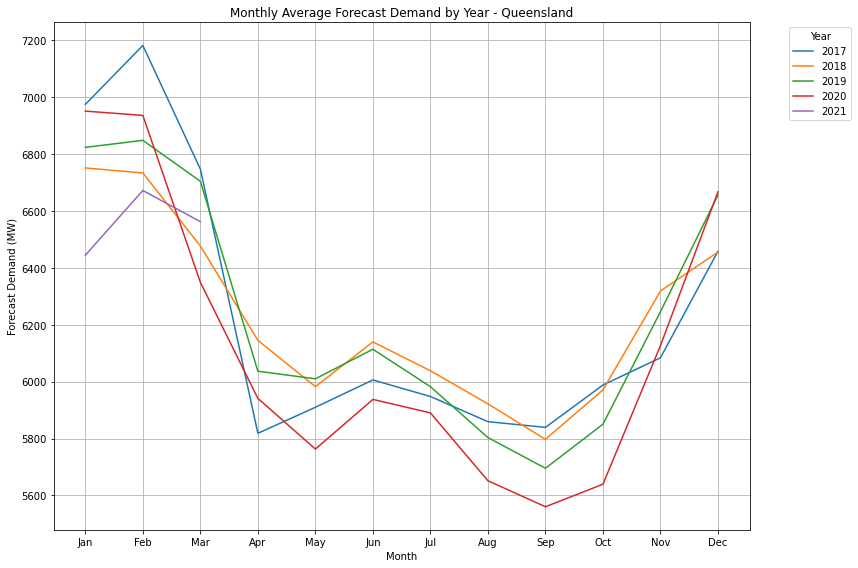

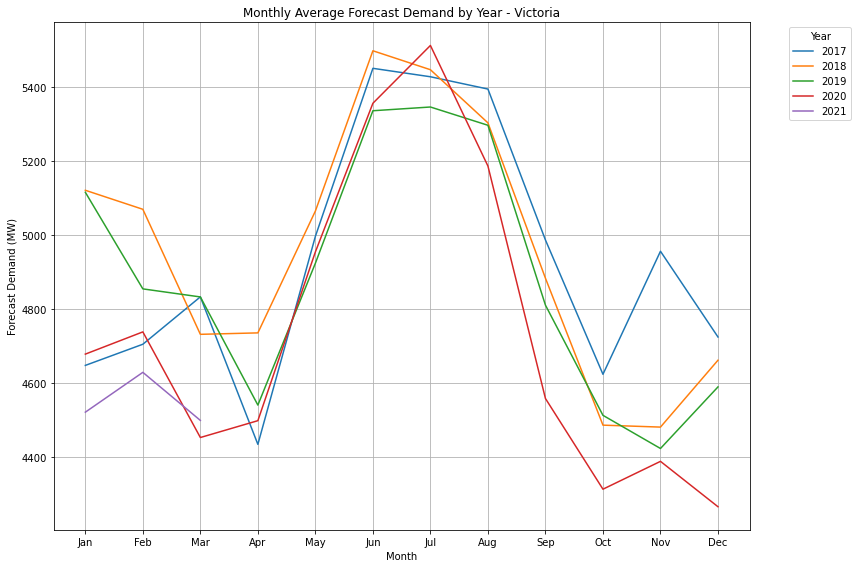

In [90]:
dfs = {
    'South Australia': forecastdemand_sa,
    'Queensland': forecastdemand_qld,
    'Victoria': forecastdemand_vic,
}

for region, df in dfs.items():
    df['YEAR'] = df['DATETIME'].dt.year
    df['MONTH'] = df['DATETIME'].dt.month

    monthly_demand = df.groupby(['YEAR', 'MONTH'])['FORECASTDEMAND'].mean().unstack(level=0)

    plt.figure(figsize=(12, 8))
    for year in monthly_demand.columns:
        plt.plot(monthly_demand.index, monthly_demand[year], label=year)

    plt.title(f'Monthly Average Forecast Demand by Year - {region}')
    plt.xlabel('Month')
    plt.ylabel('Forecast Demand (MW)')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.tight_layout()  
    plt.show()


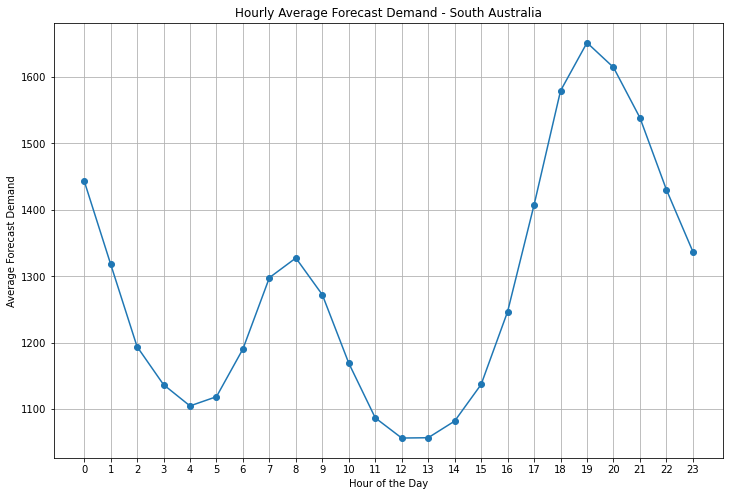

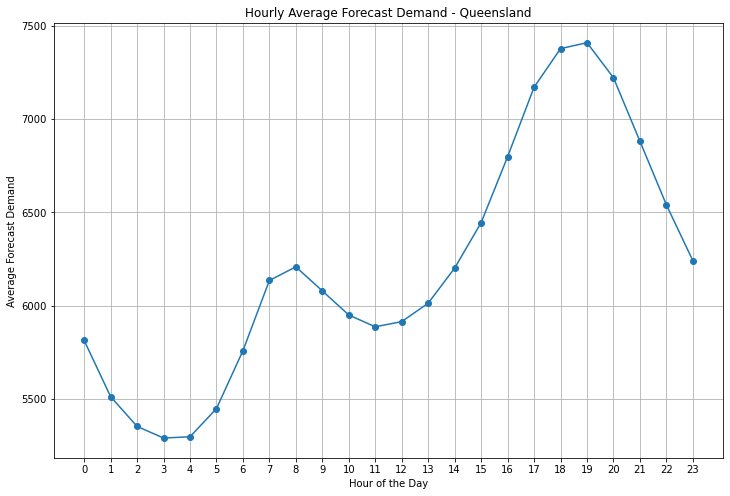

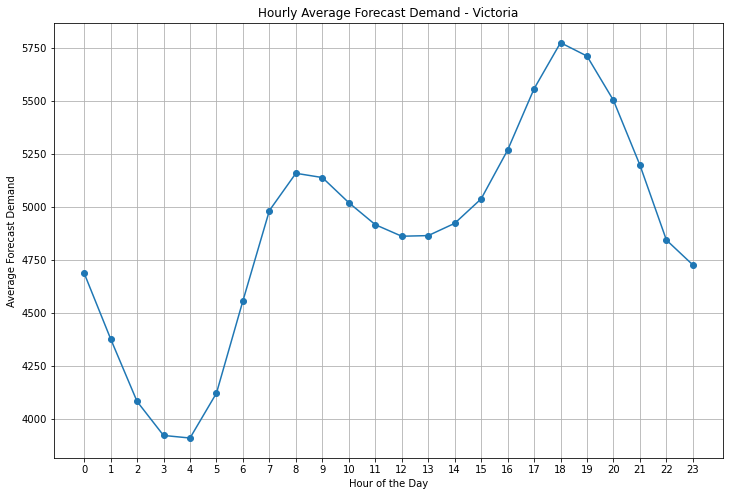

In [91]:
forecast_demand_dfs = [
    ('South Australia', forecastdemand_sa),
    ('Queensland', forecastdemand_qld),
    ('Victoria', forecastdemand_vic),
]


for region_name, df in forecast_demand_dfs:
    df['HOUR'] = df['DATETIME'].dt.hour 
    
    hourly_demand = df.groupby('HOUR')['FORECASTDEMAND'].mean()

    plt.figure(figsize=(12, 8))
    plt.plot(hourly_demand.index, hourly_demand, label='Average Demand', marker='o')
    
    plt.title(f'Hourly Average Forecast Demand - {region_name}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Forecast Demand')
    plt.xticks(range(0, 24))  
    plt.grid(True)
    plt.show()


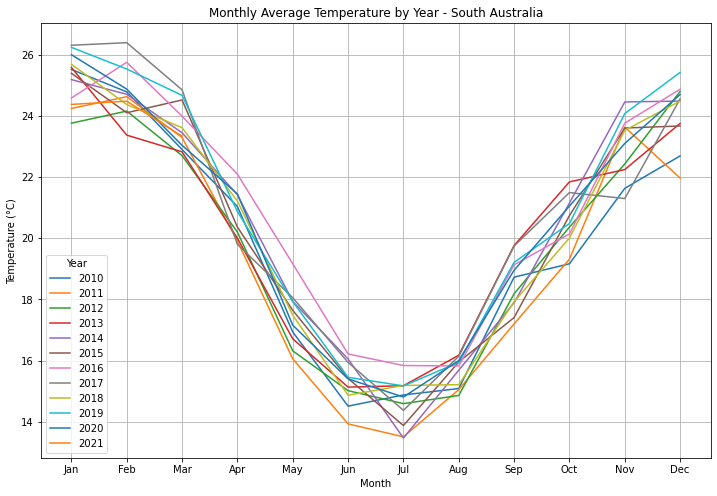

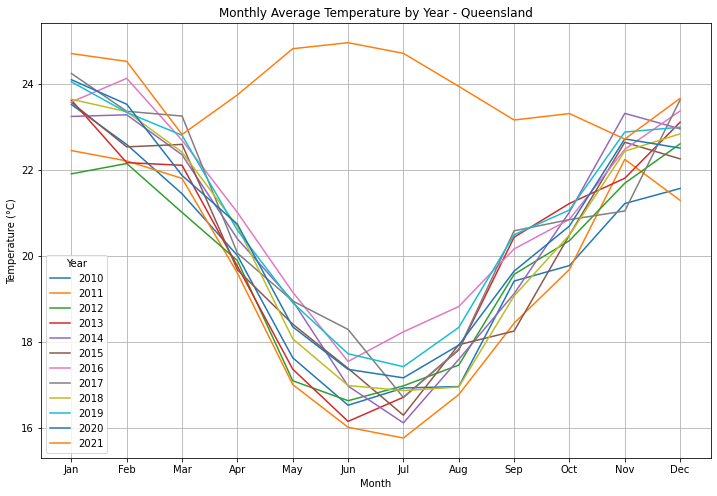

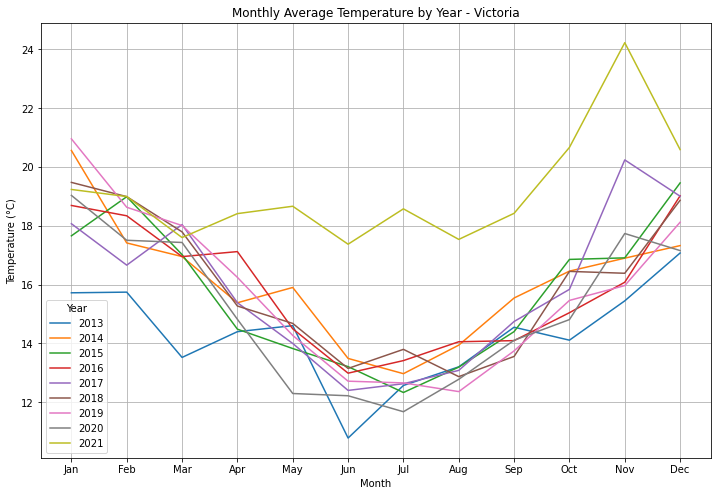

In [92]:
temperature_dfs = [temperature_sa, temperature_qld, temperature_vic]
region_names = ['South Australia', 'Queensland', 'Victoria']

for df, region in zip(temperature_dfs, region_names):
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    df['YEAR'] = df['DATETIME'].dt.year
    df['MONTH'] = df['DATETIME'].dt.month

    monthly_temp = df.groupby(['YEAR', 'MONTH'])['TEMPERATURE'].mean().unstack(level=0)

    plt.figure(figsize=(12, 8))
    for year in monthly_temp.columns:
        plt.plot(monthly_temp.index, monthly_temp[year], label=year)

    plt.title(f'Monthly Average Temperature by Year - {region}')
    plt.xlabel('Month')
    plt.ylabel('Temperature (°C)')
    plt.legend(title='Year')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.show()


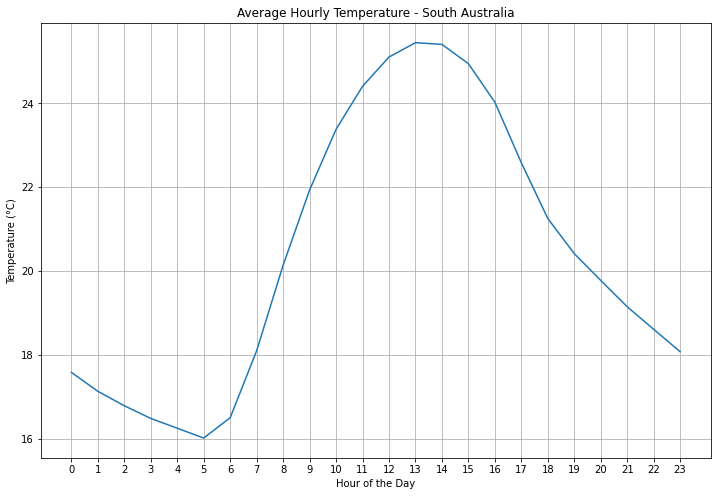

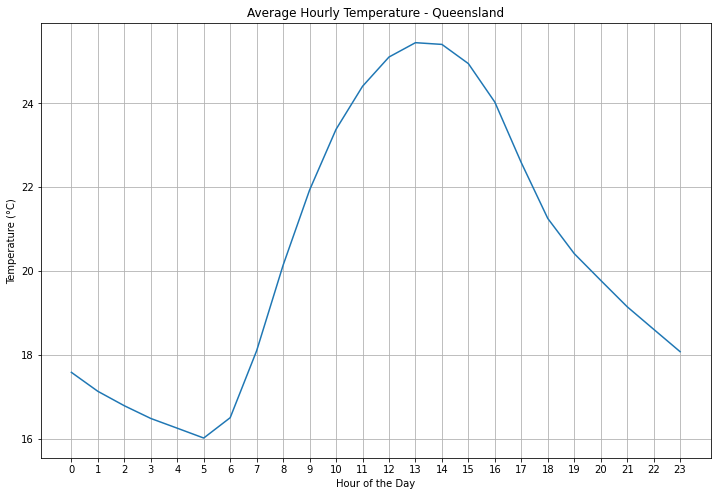

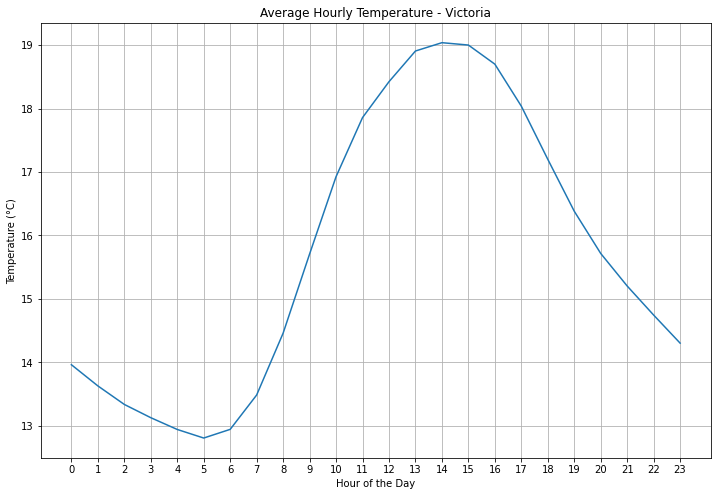

In [93]:
for df, region in zip(temperature_dfs, region_names):
    df['HOUR'] = df['DATETIME'].dt.hour
    hourly_temp = df.groupby('HOUR')['TEMPERATURE'].mean()

    plt.figure(figsize=(12, 8))
    plt.plot(hourly_temp.index, hourly_temp, label='Average Temperature')

    plt.title(f'Average Hourly Temperature - {region}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Temperature (°C)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.show()


In [94]:
temperature_dfs

[        Unnamed: 0              LOCATION            DATETIME  TEMPERATURE  \
 0                0  Adelaide (Kent Town) 2010-01-01 00:00:00         23.6   
 1                1  Adelaide (Kent Town) 2010-01-01 00:30:00         23.7   
 2                2  Adelaide (Kent Town) 2010-01-01 01:00:00         23.5   
 3                3  Adelaide (Kent Town) 2010-01-01 01:30:00         22.6   
 4                4  Adelaide (Kent Town) 2010-01-01 02:00:00         22.0   
 ...            ...                   ...                 ...          ...   
 208080      208080  Adelaide (Kent Town) 2021-03-17 22:00:00         19.6   
 208081      208081  Adelaide (Kent Town) 2021-03-17 22:30:00         19.5   
 208082      208082  Adelaide (Kent Town) 2021-03-17 23:00:00         19.4   
 208083      208083  Adelaide (Kent Town) 2021-03-17 23:30:00         19.6   
 208084      208084  Adelaide (Kent Town) 2021-03-18 00:00:00         19.5   
 
         YEAR  MONTH  HOUR  
 0       2010      1     0  
 1  

In [95]:
are_temperatures_identical = temperature_qld['TEMPERATURE'].equals(temperature_sa['TEMPERATURE'])

print(f"Are the TEMPERATURE columns in QLD and SA DataFrames exactly the same? {are_temperatures_identical}")


Are the TEMPERATURE columns in QLD and SA DataFrames exactly the same? True


## Merging the DF's all into one master DF for QLD as a proof of concept

In [111]:
forecastdemand_qld['DATETIME'] = pd.to_datetime(forecastdemand_qld['DATETIME'])
temperature_qld['DATETIME'] = pd.to_datetime(temperature_qld['DATETIME'])
totaldemand_qld['DATETIME'] = pd.to_datetime(totaldemand_qld['DATETIME'])

merged_df_1 = pd.merge(forecastdemand_qld, temperature_qld, on='DATETIME', how='inner')
df_QLD = pd.merge(merged_df_1, totaldemand_qld, on='DATETIME', how='inner')


df_QLD['forecast_error'] = df_QLD['FORECASTDEMAND'] - df_QLD['TOTALDEMAND']
df_QLD['forecast_error_ratio'] = df_QLD['forecast_error'] / df_QLD['FORECASTDEMAND']

print(df_QLD.head(10))


   PREDISPATCHSEQNO REGIONID_x  PERIODID  FORECASTDEMAND         LASTCHANGED  \
0        2016123018       QLD1        71         6425.36 2016-12-30 12:31:25   
1        2016123019       QLD1        70         6425.42 2016-12-30 13:01:33   
2        2016123020       QLD1        69         6425.42 2016-12-30 13:31:24   
3        2016123021       QLD1        68         6427.40 2016-12-30 14:01:21   
4        2016123022       QLD1        67         6426.99 2016-12-30 14:31:22   
5        2016123023       QLD1        66         6426.63 2016-12-30 15:01:26   
6        2016123024       QLD1        65         6426.63 2016-12-30 15:31:28   
7        2016123025       QLD1        64         6425.73 2016-12-30 16:01:13   
8        2016123026       QLD1        63         6426.89 2016-12-30 16:31:13   
9        2016123027       QLD1        62         6426.80 2016-12-30 17:01:13   

    DATETIME  YEAR_x  MONTH_x  HOUR_x                      LOCATION  \
0 2017-01-01    2017        1       0  Brisbane 

In [97]:
print("Forecast Demand QLD 'DATETIME' Sample and Dtype:")
print(forecastdemand_qld['DATETIME'].head())
print(forecastdemand_qld['DATETIME'].dtype)

print("\nTemperature QLD 'DATETIME' Sample and Dtype:")
print(temperature_qld['DATETIME'].head())
print(temperature_qld['DATETIME'].dtype)

print("\nTotal Demand QLD 'DATETIME' Sample and Dtype:")
print(totaldemand_qld['DATETIME'].head())
print(totaldemand_qld['DATETIME'].dtype)



Forecast Demand QLD 'DATETIME' Sample and Dtype:
0   2017-01-01 00:00:00
1   2017-01-01 00:30:00
2   2017-01-01 01:00:00
3   2017-01-01 01:30:00
4   2017-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]
datetime64[ns]

Temperature QLD 'DATETIME' Sample and Dtype:
0   2010-01-01 00:00:00
1   2010-01-01 00:30:00
2   2010-01-01 01:00:00
3   2010-01-01 01:30:00
4   2010-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]
datetime64[ns]

Total Demand QLD 'DATETIME' Sample and Dtype:
0   2010-01-01 00:00:00
1   2010-01-01 00:30:00
2   2010-01-01 01:00:00
3   2010-01-01 01:30:00
4   2010-01-01 02:00:00
Name: DATETIME, dtype: datetime64[ns]
datetime64[ns]


In [98]:
merged_df_1 = pd.merge(forecastdemand_qld, temperature_qld, on='DATETIME', how='inner')
print(merged_df_1['DATETIME'].head())
print(merged_df_1['DATETIME'].dtype)


df_QLD = pd.merge(merged_df_1, totaldemand_qld, on='DATETIME', how='inner')
print(df_QLD['DATETIME'].head())
print(df_QLD['DATETIME'].dtype)


0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: DATETIME, dtype: datetime64[ns]
datetime64[ns]
0   2017-01-01
1   2017-01-01
2   2017-01-01
3   2017-01-01
4   2017-01-01
Name: DATETIME, dtype: datetime64[ns]
datetime64[ns]


## Basic Linear Regression model on the data using Temp as only feature


In [100]:
X = df_QLD[['TEMPERATURE']].values 
y = df_QLD['TOTALDEMAND'].values 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2 ): {r2}')


Mean Squared Error (MSE): 726063.1502125746
R-squared (R2 ): 0.12285159358905828


## Engineeering Data Features based on Heating Degree days and Cooling Degree Days and Weekends for Queensland as a Proof of Concept

## Min Daily Lin Reg Model

In [101]:
df_QLD.set_index('DATETIME', inplace=True)

daily_data_min_model_QLD = df_QLD.resample('D').agg({
    'TEMPERATURE': ['max', 'min', 'mean'],
    'TOTALDEMAND': ['min', 'max', 'mean']
})

daily_data_min_model_QLD.columns = ['_'.join(col).upper() for col in daily_data_min_model_QLD.columns]

daily_data_min_model_QLD['MAXHDD'] = daily_data_min_model_QLD['TEMPERATURE_MAX'].apply(lambda x: max(0, 17 - x))
daily_data_min_model_QLD['MAXHDD^2'] = daily_data_min_model_QLD['MAXHDD'] ** 2
daily_data_min_model_QLD['MINCDD'] = daily_data_min_model_QLD['TEMPERATURE_MIN'].apply(lambda x: max(0, x - 20))
daily_data_min_model_QLD['MINCDD^2'] = daily_data_min_model_QLD['MINCDD'] ** 2
daily_data_min_model_QLD['MINCDD^3'] = daily_data_min_model_QLD['MINCDD'] ** 3
daily_data_min_model_QLD['MAX-MIN'] = daily_data_min_model_QLD['TEMPERATURE_MAX'] - daily_data_min_model_QLD['TEMPERATURE_MIN']
daily_data_min_model_QLD['SAT/SUN'] = daily_data_min_model_QLD.index.dayofweek.map(lambda x: 1 if x >= 5 else 0)

daily_data_min_model_QLD.reset_index(inplace=True)

print(daily_data_min_model_QLD.head())


    DATETIME  TEMPERATURE_MAX  TEMPERATURE_MIN  TEMPERATURE_MEAN  \
0 2017-01-01             35.6             24.0         28.479655   
1 2017-01-02             33.0             22.0         27.256982   
2 2017-01-03             31.5             19.6         24.965090   
3 2017-01-04             27.9             18.9         22.865015   
4 2017-01-05             26.3             11.3         18.009159   

   TOTALDEMAND_MIN  TOTALDEMAND_MAX  TOTALDEMAND_MEAN  MAXHDD  MAXHDD^2  \
0          5772.74          8042.19       6981.703604     0.0       0.0   
1          5872.42          7890.34       6902.371438     0.0       0.0   
2          5598.69          7312.98       6592.379227     0.0       0.0   
3          5413.75          7409.95       6491.633202     0.0       0.0   
4          5469.73          7568.24       6566.716032     0.0       0.0   

   MINCDD  MINCDD^2  MINCDD^3  MAX-MIN  SAT/SUN  
0     4.0      16.0      64.0     11.6        1  
1     2.0       4.0       8.0     11.0  

In [102]:
daily_data_min_model_QLD.describe

<bound method NDFrame.describe of        DATETIME  TEMPERATURE_MAX  TEMPERATURE_MIN  TEMPERATURE_MEAN  \
0    2017-01-01             35.6             24.0         28.479655   
1    2017-01-02             33.0             22.0         27.256982   
2    2017-01-03             31.5             19.6         24.965090   
3    2017-01-04             27.9             18.9         22.865015   
4    2017-01-05             26.3             11.3         18.009159   
...         ...              ...              ...               ...   
1533 2021-03-14             30.3             19.9         25.075826   
1534 2021-03-15             23.7             19.8         21.405743   
1535 2021-03-16             24.8             18.7         20.221434   
1536 2021-03-17             21.2             18.4         19.651201   
1537 2021-03-18             19.5             19.5         19.500000   

      TOTALDEMAND_MIN  TOTALDEMAND_MAX  TOTALDEMAND_MEAN  MAXHDD  MAXHDD^2  \
0             5772.74          8042

In [104]:
for col in ['TEMPERATURE_MAX', 'TEMPERATURE_MIN', 'TEMPERATURE_MEAN', 
            'TOTALDEMAND_MIN', 'TOTALDEMAND_MAX', 'TOTALDEMAND_MEAN', 'MAX-MIN']:
    daily_data_min_model_QLD[col].fillna(daily_data_min_model_QLD[col].mean(), inplace=True)

In [105]:
X = daily_data_min_model_QLD[['MAXHDD', 'MAXHDD^2', 'MINCDD', 'MINCDD^2', 'MINCDD^3', 'MAX-MIN', 'SAT/SUN']]
y = daily_data_min_model_QLD['TOTALDEMAND_MEAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 180622.57490606958
R-squared (R2): 0.27479031615669747


In [107]:
predicted_values = model.predict(X)

daily_data_min_model_QLD['predicted_value'] = predicted_values

daily_data_min_model_QLD['predicted_error'] = daily_data_min_model_QLD['predicted_value'] - daily_data_min_model_QLD['TOTALDEMAND_MEAN']

daily_data_min_model_QLD['relative_error'] = daily_data_min_model_QLD['predicted_error'] / daily_data_min_model_QLD['TOTALDEMAND_MEAN']

print(daily_data_min_model_QLD[['TOTALDEMAND_MEAN', 'predicted_value', 'predicted_error', 'relative_error']].head())


   TOTALDEMAND_MEAN  predicted_value  predicted_error  relative_error
0       6981.703604      6630.929951      -350.773653       -0.050242
1       6902.371438      6774.234194      -128.137244       -0.018564
2       6592.379227      6181.418618      -410.960609       -0.062339
3       6491.633202      6185.304652      -306.328550       -0.047188
4       6566.716032      6177.264581      -389.451451       -0.059307


In [108]:
mape = (daily_data_min_model_QLD['predicted_error'].abs() / daily_data_min_model_QLD['TOTALDEMAND_MEAN'].abs()).mean() * 100

print(f'MAPE: {mape}%')


MAPE: 5.049044117414027%


In [109]:
print(daily_data_min_model_QLD['relative_error'].mean())
print(daily_data_min_model_QLD['relative_error'].std())

0.004717016867955302
0.06580500470412788


## Max Daily Lin Reg Model

In [112]:
df_QLD.set_index('DATETIME', inplace=True)

daily_data_max_model_QLD = df_QLD.resample('D').agg({
    'TEMPERATURE': ['max', 'min', 'mean'],
    'TOTALDEMAND': ['min', 'max', 'mean']
})

daily_data_max_model_QLD.columns = ['_'.join(col).upper() for col in daily_data_max_model_QLD.columns]

daily_data_max_model_QLD['MINHDD'] = daily_data_max_model_QLD['TEMPERATURE_MIN'].apply(lambda x: max(0, 20 - x))
daily_data_max_model_QLD['MINHDD^2'] = daily_data_max_model_QLD['MINHDD'] ** 2
daily_data_max_model_QLD['MAXCDD'] = daily_data_max_model_QLD['TEMPERATURE_MAX'].apply(lambda x: max(0, x - 20))
daily_data_max_model_QLD['MAXCDD^2'] = daily_data_max_model_QLD['MAXCDD'] ** 2
daily_data_max_model_QLD['MAXCDD^3'] = daily_data_max_model_QLD['MAXCDD'] ** 3
daily_data_max_model_QLD['MAX-MIN'] = daily_data_max_model_QLD['TEMPERATURE_MAX'] - daily_data_max_model_QLD['TEMPERATURE_MIN']
daily_data_max_model_QLD['SAT/SUN'] = daily_data_max_model_QLD.index.dayofweek.map(lambda x: 1 if x >= 5 else 0)

daily_data_max_model_QLD.reset_index(inplace=True)

print(daily_data_max_model_QLD.head())


    DATETIME  TEMPERATURE_MAX  TEMPERATURE_MIN  TEMPERATURE_MEAN  \
0 2017-01-01             35.6             24.0         28.479655   
1 2017-01-02             33.0             22.0         27.256982   
2 2017-01-03             31.5             19.6         24.965090   
3 2017-01-04             27.9             18.9         22.865015   
4 2017-01-05             26.3             11.3         18.009159   

   TOTALDEMAND_MIN  TOTALDEMAND_MAX  TOTALDEMAND_MEAN  MINHDD  MINHDD^2  \
0          5772.74          8042.19       6981.703604     0.0      0.00   
1          5872.42          7890.34       6902.371438     0.0      0.00   
2          5598.69          7312.98       6592.379227     0.4      0.16   
3          5413.75          7409.95       6491.633202     1.1      1.21   
4          5469.73          7568.24       6566.716032     8.7     75.69   

   MAXCDD  MAXCDD^2  MAXCDD^3  MAX-MIN  SAT/SUN  
0    15.6    243.36  3796.416     11.6        1  
1    13.0    169.00  2197.000     11.0  

In [113]:
for col in ['TEMPERATURE_MAX', 'TEMPERATURE_MIN', 'TEMPERATURE_MEAN', 
            'TOTALDEMAND_MIN', 'TOTALDEMAND_MAX', 'TOTALDEMAND_MEAN', 'MAX-MIN']:
    daily_data_max_model_QLD[col].fillna(daily_data_max_model_QLD[col].mean(), inplace=True)

In [114]:
X = daily_data_max_model_QLD[['MINHDD', 'MINHDD^2', 'MAXCDD', 'MAXCDD^2', 'MAXCDD^3', 'MAX-MIN', 'SAT/SUN']]
y = daily_data_max_model_QLD['TOTALDEMAND_MEAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 157912.46670830215
R-squared (R2): 0.3659726636274657


In [115]:
predicted_values = model.predict(X)

daily_data_max_model_QLD['predicted_value'] = predicted_values

daily_data_max_model_QLD['predicted_error'] = daily_data_max_model_QLD['predicted_value'] - daily_data_max_model_QLD['TOTALDEMAND_MEAN']

daily_data_max_model_QLD['relative_error'] = daily_data_max_model_QLD['predicted_error'] / daily_data_max_model_QLD['TOTALDEMAND_MEAN']

print(daily_data_max_model_QLD[['TOTALDEMAND_MEAN', 'predicted_value', 'predicted_error', 'relative_error']].head())


   TOTALDEMAND_MEAN  predicted_value  predicted_error  relative_error
0       6981.703604      6709.779223      -271.924381       -0.038948
1       6902.371438      6814.809523       -87.561914       -0.012686
2       6592.379227      6598.499430         6.120203        0.000928
3       6491.633202      6376.859989      -114.773212       -0.017680
4       6566.716032      5993.612634      -573.103398       -0.087274


In [116]:
mape = (daily_data_max_model_QLD['predicted_error'].abs() / daily_data_min_model_QLD['TOTALDEMAND_MEAN'].abs()).mean() * 100

print(f'MAPE: {mape}%')

MAPE: 4.698884248146148%


In [117]:
print(daily_data_max_model_QLD['relative_error'].mean())
print(daily_data_max_model_QLD['relative_error'].std())

0.004614164564276389
0.06299781287098125


In [118]:
print("Columns in daily_data_max_model_QLD:")
print(daily_data_max_model_QLD.columns.tolist())

print("\nColumns in daily_data_min_model_QLD:")
print(daily_data_min_model_QLD.columns.tolist())


Columns in daily_data_max_model_QLD:
['DATETIME', 'TEMPERATURE_MAX', 'TEMPERATURE_MIN', 'TEMPERATURE_MEAN', 'TOTALDEMAND_MIN', 'TOTALDEMAND_MAX', 'TOTALDEMAND_MEAN', 'MINHDD', 'MINHDD^2', 'MAXCDD', 'MAXCDD^2', 'MAXCDD^3', 'MAX-MIN', 'SAT/SUN', 'predicted_value', 'predicted_error', 'relative_error']

Columns in daily_data_min_model_QLD:
['DATETIME', 'TEMPERATURE_MAX', 'TEMPERATURE_MIN', 'TEMPERATURE_MEAN', 'TOTALDEMAND_MIN', 'TOTALDEMAND_MAX', 'TOTALDEMAND_MEAN', 'MAXHDD', 'MAXHDD^2', 'MINCDD', 'MINCDD^2', 'MINCDD^3', 'MAX-MIN', 'SAT/SUN', 'predicted_value', 'predicted_error', 'relative_error']


## Creating a combo lin reg model to see if its more accurate

In [119]:
common_cols = ['DATETIME', 'TEMPERATURE_MAX', 'TEMPERATURE_MIN', 'TEMPERATURE_MEAN',
               'TOTALDEMAND_MIN', 'TOTALDEMAND_MAX', 'TOTALDEMAND_MEAN', 'SAT/SUN', 'MAX-MIN']

unique_features_max = ['MINHDD', 'MINHDD^2', 'MAXCDD', 'MAXCDD^2', 'MAXCDD^3']
unique_features_min = ['MAXHDD', 'MAXHDD^2', 'MINCDD', 'MINCDD^2', 'MINCDD^3']

cols_max_model = common_cols + unique_features_max
cols_min_model = common_cols + unique_features_min

combo_model_df_QLD = pd.merge(daily_data_max_model_QLD[cols_max_model],
                          daily_data_min_model_QLD[cols_min_model],
                          on=['DATETIME', 'TEMPERATURE_MAX', 'TEMPERATURE_MIN', 'TEMPERATURE_MEAN',
                              'TOTALDEMAND_MIN', 'TOTALDEMAND_MAX', 'TOTALDEMAND_MEAN', 'SAT/SUN', 'MAX-MIN'],
                          how='outer')

print(combo_model_df_QLD.head())


    DATETIME  TEMPERATURE_MAX  TEMPERATURE_MIN  TEMPERATURE_MEAN  \
0 2017-01-01             35.6             24.0         28.479655   
1 2017-01-02             33.0             22.0         27.256982   
2 2017-01-03             31.5             19.6         24.965090   
3 2017-01-04             27.9             18.9         22.865015   
4 2017-01-05             26.3             11.3         18.009159   

   TOTALDEMAND_MIN  TOTALDEMAND_MAX  TOTALDEMAND_MEAN  SAT/SUN  MAX-MIN  \
0          5772.74          8042.19       6981.703604        1     11.6   
1          5872.42          7890.34       6902.371438        0     11.0   
2          5598.69          7312.98       6592.379227        0     11.9   
3          5413.75          7409.95       6491.633202        0      9.0   
4          5469.73          7568.24       6566.716032        0     15.0   

   MINHDD  MINHDD^2  MAXCDD  MAXCDD^2  MAXCDD^3  MAXHDD  MAXHDD^2  MINCDD  \
0     0.0      0.00    15.6    243.36  3796.416     0.0       0

In [120]:
print("Columns in combo_model_df_QLD:")
print(combo_model_df_QLD.columns.tolist())

Columns in combo_model_df_QLD:
['DATETIME', 'TEMPERATURE_MAX', 'TEMPERATURE_MIN', 'TEMPERATURE_MEAN', 'TOTALDEMAND_MIN', 'TOTALDEMAND_MAX', 'TOTALDEMAND_MEAN', 'SAT/SUN', 'MAX-MIN', 'MINHDD', 'MINHDD^2', 'MAXCDD', 'MAXCDD^2', 'MAXCDD^3', 'MAXHDD', 'MAXHDD^2', 'MINCDD', 'MINCDD^2', 'MINCDD^3']


In [121]:
X = combo_model_df_QLD[['SAT/SUN', 'MAX-MIN', 'MINHDD', 'MINHDD^2', 'MAXCDD', 'MAXCDD^2', 'MAXCDD^3', 
                              'MAXHDD', 'MAXHDD^2', 'MINCDD', 'MINCDD^2', 'MINCDD^3']]
y = combo_model_df_QLD['TOTALDEMAND_MEAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 160347.1812173011
R-squared (R2): 0.35619714946353553


## Testing a RandomForrest on the DF

In [122]:
X = combo_model_df_QLD[['SAT/SUN', 'MAX-MIN', 'MINHDD', 'MINHDD^2', 'MAXCDD', 'MAXCDD^2', 'MAXCDD^3', 
                        'MAXHDD', 'MAXHDD^2', 'MINCDD', 'MINCDD^2', 'MINCDD^3']]
y = combo_model_df_QLD['TOTALDEMAND_MEAN']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 192324.18973161216
R-squared (R2): 0.22780768182928335


## Testing a basic NN

In [123]:

X = combo_model_df_QLD[['SAT/SUN', 'MAX-MIN', 'MINHDD', 'MINHDD^2', 'MAXCDD', 'MAXCDD^2', 'MAXCDD^3', 
                        'MAXHDD', 'MAXHDD^2', 'MINCDD', 'MINCDD^2', 'MINCDD^3']]
y = combo_model_df_QLD['TOTALDEMAND_MEAN']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

neural_network_model = MLPRegressor(hidden_layer_sizes=(200, 200), activation='relu', 
                                    random_state=42, max_iter=1000)

neural_network_model.fit(X_train_scaled, y_train)

y_pred = neural_network_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 156490.6681773952
R-squared (R2): 0.37168126380451516


In [124]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN
X.fillna(X.mean(), inplace=True)  

y.replace([np.inf, -np.inf], np.nan, inplace=True)  
y.fillna(y.mean(), inplace=True)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/Users/joshuaevans/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/Users/joshuaevans/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## Performance is the Best so Far - Use Gridsearch to find best Hyper Parameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=42, max_iter=1000))
])

param_grid = {
    'mlp__hidden_layer_sizes': [(100, 100), (200, 200)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.05],  # L2 penalty (regularization term) parameter
    'mlp__learning_rate_init': [0.001, 0.01]  # Learning rate
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=3, scoring='r2')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
